# Financial Programming - IÉSEG, Lille - MBD 2021-2022
## Group Project - Financial Data

### Data Exploration

# Check for library requirements & install if missing

In [3]:
import sys
import subprocess
import importlib

packages = ['pandas', 'numpy','pathlib','os','glob', 'textblob']
[subprocess.check_call(['pip', 'install', pkg]) 
for pkg in packages if not importlib.util.find_spec(pkg)]

[]

# Import libraries

In [4]:
import pandas as pd
import numpy as np

from pathlib import Path
import pathlib
import os
import glob

from textblob import TextBlob

# Client Table

In [8]:
# extract client csv file
client = pd.read_csv('C:/Users/HP PC/Desktop/IESEG_Classes/Financial_Programming/Group Project/fin_datamart-main/FP_GroupProject/data/raw/data_berka/client.asc', sep=';')
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


In [9]:

# Extract the year, month, and day from birth_number and create 3 new columns

# Transform the birth day into year
client['birth_year'] = '19' + client['birth_number'].astype(str).str[:2]
client['birth_year'] = client['birth_year'].astype(int)

# Transform the birth day to day
client['birth_day'] = client['birth_number'].astype(str).str[-2:].astype(int)

# Extract the birth month
client['birth_month'] = client['birth_number'].astype(str).str[2:4].astype(int)


# Create the gender column based on the birth month

# Extract and correct the gender
client['gender'] = 'M'
client.loc[client['birth_month'] > 50, 'gender'] = 'F'

# Correct the birth month
client.loc[client['birth_month'] > 50, 'birth_month'] = client.loc[client['birth_month'] > 50, 'birth_month'] - 50
client.head()

# Create age and age_group variables. Assuming that the current year is 1996

# Age
client['age'] = 1996 - client['birth_year']

# Age group
client['age_group'] = client['age'] // 10 * 10
client.head()

client.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age,age_group
0,1,706213,18,1970,13,12,F,26,20
1,2,450204,1,1945,4,2,M,51,50
2,3,406009,1,1940,9,10,F,56,50
3,4,561201,5,1956,1,12,M,40,40
4,5,605703,5,1960,3,7,F,36,30


# Account Table

**Input data**

In [20]:
# extract account details from  csv file
account = pd.read_csv('C:/Users/HP PC/Desktop/IESEG_Classes/Financial_Programming/Group Project/fin_datamart-main/FP_GroupProject/data/raw/data_berka/account.asc', sep=';')
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


# Card Table

In [19]:
# extract card details from csv file
card = pd.read_csv('C:/Users/HP PC/Desktop/IESEG_Classes/Financial_Programming/Group Project/fin_datamart-main/FP_GroupProject/data/raw/data_berka/card.asc', sep=';')
card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


# Disp Table

In [33]:
# extract card details from csv file
disp = pd.read_csv('C:/Users/HP PC/Desktop/IESEG_Classes/Financial_Programming/Group Project/fin_datamart-main/FP_GroupProject/data/raw/data_berka/disp.asc', sep=';')

#merge disp and card table and remove disp_id
disp_card = pd.merge(disp,card, on = 'disp_id',how = 'outer')

#fill null vales with zero
disp_card = disp_card.fillna(0)

disp_card.head()


,disp_id,client_id,account_id,type_x,card_id,type_y,issued
0,1,1,1,OWNER,0.0,0,0
1,2,2,2,OWNER,0.0,0,0
2,3,3,2,DISPONENT,0.0,0,0
3,4,4,3,OWNER,0.0,0,0
4,5,5,3,DISPONENT,0.0,0,0


In [34]:
disp_card = disp_card.pivot_table(index = 'client_id',
                        columns = 'type_y',
                        values = 'account_id',
                        aggfunc = 'count')
#fill null vales with zero
disp_card = disp_card.fillna(0)

disp_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5369 entries, 1 to 13998
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        5369 non-null   float64
 1   classic  5369 non-null   float64
 2   gold     5369 non-null   float64
 3   junior   5369 non-null   float64
dtypes: float64(4)
memory usage: 209.7 KB


# Trans Table 

In [35]:
# fetch Trans details from csv file
trans = pd.read_csv('C:/Users/HP PC/Desktop/IESEG_Classes/Financial_Programming/Group Project/fin_datamart-main/FP_GroupProject/data/raw/data_berka/trans.asc', sep=';', low_memory=False)

#Convert trans_id to int so that we can use it for indexing
trans.trans_id = pd.to_numeric(trans.trans_id, errors='coerce').astype('Int64')

trans.set_index('trans_id',drop =False, inplace =True)
trans.sort_index(axis = 0)
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
trans_id,,,,,,,,,,
695247,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
171812,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
207264,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
1117247,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
579373,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [40]:
#check if any olumn of trans doesn't have values that should be in Operations
print(trans[trans['type'] == 'VYBER']['operation'].unique())
print(trans[trans['type'] == 'PREVOD NA UCET']['operation'].unique())
print(trans[trans['type'] == "PREVOD Z UCTU"]['operation'].unique())
print(trans[trans['type'] == 'VKLAD']['operation'].unique())
print(trans[trans['type'] == "VYBER KARTOU"]['operation'].unique())

['Withdrawal in cash']
[]
[]
[]
[]


In [44]:
# create a dictionary to identify credit and withdrawl
type_dict = {'PRIJEM':'credit','VYDAJ':'withdrawl', 'VYBER':'withdrawl' }

#map dictionary to base dataframe for credit and withdrawl
trans['trans_type_en'] = trans['type'].map(type_dict)

##Replace values for OPerations columns as well
trans.loc[trans['operation'] == 'VYBER KARTOU','operation'] = 'cc withdrawal'
trans.loc[trans['operation'] == 'VKLAD','operation'] = 'credit in cash'
trans.loc[trans['operation'] == 'PREVOD Z UCTU','operation'] = 'collection from another bank'
trans.loc[trans['operation'] == 'VYDAJ','operation'] = 'Withdrawal in cash'
trans.loc[trans['operation'] == 'PREVOD NA UCET','operation'] = 'remittance to another bank'

In [47]:
#check if there is any missing value in operation by relating it with the type
print(trans[trans['type'] == 'withdrawal']['operation'].isna().sum())
print(trans[trans['type'] == "credit"]['operation'].isna().sum())

0
0


In [48]:
#Replace the values for k_symbol column as well
trans.loc[trans.k_symbol.isna(), 'k_symbol is NA'] = 'Missing'
trans.loc[trans['k_symbol is NA'].isna(), 'k_symbol is NA'] = 'No'

trans.loc[trans['k_symbol'] == "POJISTNE", "k_symbol"]= 'insurance'
trans.loc[trans['k_symbol'] == "SLUZBY", "k_symbol"]= 'payment for statement'
trans.loc[trans['k_symbol'] == "UROK", "k_symbol"]= 'interest credited'
trans.loc[trans['k_symbol'] == "SANKC. UROK", "k_symbol"]= 'sanctions'
trans.loc[trans['k_symbol'] == "SIPO", "k_symbol"]= 'household' 
trans.loc[trans['k_symbol'] == "DUCHOD", "k_symbol"]= 'old age pension'
trans.loc[trans['k_symbol'] == "UVER", "k_symbol"]= 'loan payment'

#Making sure that there are no wrong values
trans.loc[trans.k_symbol.isna(), 'k_symbol'] = None
trans.loc[trans.k_symbol == ' ', 'k_symbol'] = None

print(trans.k_symbol.unique())
print(' ')

print(trans[trans['type'] == 'withdrawal']['k_symbol'].isna().sum())
print(trans[trans['type'] == "credit"]['k_symbol'].isna().sum())

[None 'old age pension' 'interest credited' 'household'
 'payment for statement' 'insurance' 'sanctions' 'loan payment']
 
0
0


In [51]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,trans_type_en,k_symbol is NA
trans_id,,,,,,,,,,,,
695247,695247,2378,930101,PRIJEM,credit in cash,700.0,700.0,None,NaN,NaN,credit,Missing
171812,171812,576,930101,PRIJEM,credit in cash,900.0,900.0,None,NaN,NaN,credit,Missing
207264,207264,704,930101,PRIJEM,credit in cash,1000.0,1000.0,None,NaN,NaN,credit,Missing
1117247,1117247,3818,930101,PRIJEM,credit in cash,600.0,600.0,None,NaN,NaN,credit,Missing
579373,579373,1972,930102,PRIJEM,credit in cash,400.0,400.0,None,NaN,NaN,credit,Missing


In [54]:
trans["amount"].min()

67.95

In [56]:
trans["amount"].max()

13600.0

# check  outliers in the amount(Trans table)

In [57]:
#check  outliers in the amount
trans.amount.quantile([0.25,0.5,0.75]) #1st quartile is 135.9 and third is 6800$

quart1 = pd.DataFrame(trans.amount.quantile([0.25,0.5,0.75])).loc[0.25,] / 2
quart3 = 2 * pd.DataFrame(trans.amount.quantile([0.25,0.5,0.75])).loc[0.75,:]

print(quart1)
print(quart3)

amount    67.95
Name: 0.25, dtype: float64
amount    13600.0
Name: 0.75, dtype: float64


In [58]:
#add a column outlier where we specify rows that we want to update
trans.loc[(trans.amount > 13600) | (trans.amount < 67.95),'outlier'] = 'Yes'
trans.loc[trans.outlier.isna(),'outlier'] = 'No'

# if considering outliers as 2 * 3rd Quartiles, then  replace the outliers by 2 * 3rd quartile
trans.loc[trans.amount > 13600,'amount'] = 13600

# if considering outliers as 1st Quartiles / 2, then replace the outliers by 1st quartile/2
trans.loc[trans.amount < 67.95 ,'amount'] = 67.95

In [59]:
b = pd.DataFrame(trans[['bank','account']])
b.loc[b.account.notna(),'bank'].isna().sum()

21881

In [60]:
trans.loc[trans.bank.isna(),'Bank is na'] = 'Missing'
trans.loc[trans['Bank is na'].isna(),'Bank is na'] = 'No'

trans.loc[trans.bank.isna(),'bank'] = 'Other'

trans.loc[trans.account.isna(),'Account is na'] = 'Missing'
trans.loc[trans['Account is na'].isna(),'Account is na'] = 'No'

trans.loc[trans.account.isna(),'account'] = 'Other'
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,trans_type_en,k_symbol is NA,outlier,Bank is na,Account is na
trans_id,,,,,,,,,,,,,,,
695247,695247,2378,930101,PRIJEM,credit in cash,700.0,700.0,None,Other,Other,credit,Missing,No,Missing,Missing
171812,171812,576,930101,PRIJEM,credit in cash,900.0,900.0,None,Other,Other,credit,Missing,No,Missing,Missing
207264,207264,704,930101,PRIJEM,credit in cash,1000.0,1000.0,None,Other,Other,credit,Missing,No,Missing,Missing
1117247,1117247,3818,930101,PRIJEM,credit in cash,600.0,600.0,None,Other,Other,credit,Missing,No,Missing,Missing
579373,579373,1972,930102,PRIJEM,credit in cash,400.0,400.0,None,Other,Other,credit,Missing,No,Missing,Missing


In [61]:
# replace null of trans table per customer for the joins

Ntrans = trans.pivot_table(index = 'account_id',
                          columns = 'k_symbol',
                          values = 'amount',
                          aggfunc = sum)
Ntrans = Ntrans.fillna(0)
Ntrans.head()

k_symbol,household,insurance,interest credited,loan payment,old age pension,payment for statement,sanctions
account_id,,,,,,,
1,98080.0,0.0,3310.25,0.0,0.0,2718.00,0.0
2,472290.0,0.0,10771.95,80944.8,0.0,4416.75,0.0
3,14755.0,46007.0,2125.00,0.0,0.0,883.35,0.0
4,60262.0,0.0,2756.25,0.0,188802.0,1970.55,0.0
5,37352.0,0.0,1626.45,0.0,95323.0,951.30,0.0


# Order Table

In [62]:
# fetch Order details from csv file
order = pd.read_csv('C:/Users/HP PC/Desktop/IESEG_Classes/Financial_Programming/Group Project/fin_datamart-main/FP_GroupProject/data/raw/data_berka/order.asc', sep=';', low_memory=False)
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [63]:
#translate the names of the k_symbol to english
order.loc[order.k_symbol == 'POJISTNE','k_symbol'] = 'insurance'
order.loc[order.k_symbol == 'SIPO','k_symbol'] = 'household'
order.loc[order.k_symbol == 'UVER','k_symbol'] = 'loan'

In [64]:
#Create a pivot to get one row per client
order1 = order.pivot_table(index = 'account_id',
                          columns = 'k_symbol',
                          values = 'order_id',
                          aggfunc = 'count')

order1 = order1.fillna(0)
order1.reset_index(drop = False, inplace = True)
order1 = order1.drop(order1.columns[1], axis=1)

order1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3758 entries, 0 to 3757
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   account_id  3758 non-null   int64  
 1   LEASING     3758 non-null   float64
 2   household   3758 non-null   float64
 3   insurance   3758 non-null   float64
 4   loan        3758 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 146.9 KB


# Loan Table

In [73]:
## fetch loan Loan from csv file
loan = pd.read_csv('C:/Users/HP PC/Desktop/IESEG_Classes/Financial_Programming/Group Project/fin_datamart-main/FP_GroupProject/data/raw/data_berka/loan.asc', sep=';')
loan.info()
loan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    int64  
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB


,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [77]:
#rename independent variables from loan table to join with main table
loan = loan.rename(columns={'amount':'loan_amount', 'duration' : 'loan_duration', 'status':'loan_status'})

In [78]:
#Filter dependent variable loan data i.e loan data for year 1997
loan = loan[loan['date'].astype(str).str[:2].isin(['97'])]
loan.head()

,loan_id,account_id,date,loan_amount,loan_duration,payments,loan_status
328,5895,4473,970103,93960,60,1566.0,C
329,7122,10365,970104,260640,36,7240.0,D
330,6173,5724,970108,232560,48,4845.0,C
331,6142,5591,970121,221880,60,3698.0,C
332,5358,2018,970121,38520,12,3210.0,A


# Outliers in loan table

In [79]:
#  check for outliers in the loan table
print(loan.loan_amount.quantile([0.25,0.5,0.75]))

loan.loc[(loan.loan_amount < 66732 / 2) | (loan.loan_amount > 210654 * 2), 'outlier'] = 'Yes'
loan.loc[loan.outlier.isna(),'outlier'] = 'No'

#replace the outliers with 2 * 3rd quartile and 1st quartile/2
loan.loc[loan.loan_amount < 66732 / 2, 'amount'] = 66732 / 2
loan.loc[loan.loan_amount > 210654 * 2,'amount'] = 210654 * 2

0.25     67428.0
0.50    101520.0
0.75    224010.0
Name: loan_amount, dtype: float64


In [66]:
#group the loan table per customer


Nloan= loan.pivot_table(index = 'account_id',
                        columns = 'status',
                        values = 'loan_id',
                        aggfunc = 'count') 
#Nloan.loc[Nloan.isna(),['A','B','C','D']] = 0

Nloan = Nloan.fillna(0)
Nloan.head()

status,A,B,C,D
account_id,,,,
2,1.0,0.0,0.0,0.0
19,0.0,1.0,0.0,0.0
25,1.0,0.0,0.0,0.0
37,0.0,0.0,0.0,1.0
38,0.0,0.0,1.0,0.0


# District Table

In [81]:
## fetch loan District from csv file
district = pd.read_csv('C:/Users/HP PC/Desktop/IESEG_Classes/Financial_Programming/Group Project/fin_datamart-main/FP_GroupProject/data/raw/data_berka/district.asc', sep=';')


In [83]:
district = district.rename(columns={'A1': 'district_id'})
district = district.rename(columns={'A2': 'district name'})
district = district.rename(columns={'A3': 'region'})
district = district.rename(columns={'A4': 'no. of inhabitants'})
district = district.rename(columns={'A5': 'no. of municipalities with inhabitants < 499'})
district = district.rename(columns={'A6': 'no. of municipalities with inhabitants 500-1999'})
district = district.rename(columns={'A7': 'no. of municipalities with inhabitants 2000-9999'})
district = district.rename(columns={'A8': 'no. of municipalities with inhabitants >10000'})
district = district.rename(columns={'A9': 'no. of cities'})
district = district.rename(columns={'A10': 'ratio of urban inhabitants'})
district = district.rename(columns={'A11': 'average salary'})
district = district.rename(columns={'A12': 'unemploymant rate 95'})
district = district.rename(columns={'A13': 'unemploymant rate 96'})
district = district.rename(columns={'A14': 'no. of enterpreneurs per 1000 inhabitants'})
district = district.rename(columns={'A15': 'no. of commited crimes 95'})
district = district.rename(columns={'A16': 'no. of commited crimes 96'})

district.head()

,district_id,district name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate 95,unemploymant rate 96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes 95,no. of commited crimes 96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


# Joining all Tables  (INNER JOIN) 

In [94]:
# Joining tables Client and District using "district_id"
client_dist = pd.merge(client, district, how= 'inner',on='district_id')
client_dist.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age,age_group,district name,...,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate 95,unemploymant rate 96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes 95,no. of commited crimes 96
0,1,706213,18,1970,13,12,F,26,20,Pisek,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
1,420,780313,18,1978,13,3,M,18,10,Pisek,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
2,499,355708,18,1935,8,7,F,61,60,Pisek,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
3,519,800413,18,1980,13,4,M,16,10,Pisek,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
4,682,791021,18,1979,21,10,M,17,10,Pisek,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910


In [95]:
# Joining tables Client and Disp using "client_id"
client_disp= pd.merge(client,disp,how='inner',on='client_id')
client_disp.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age,age_group,disp_id,account_id,type
0,1,706213,18,1970,13,12,F,26,20,1,1,OWNER
1,2,450204,1,1945,4,2,M,51,50,2,2,OWNER
2,3,406009,1,1940,9,10,F,56,50,3,2,DISPONENT
3,4,561201,5,1956,1,12,M,40,40,4,3,OWNER
4,5,605703,5,1960,3,7,F,36,30,5,3,DISPONENT


In [96]:
# Joining tables Disp and Card using "disp_id"
disp_card= pd.merge(disp,card,how='inner',on='disp_id')
disp_card.head()

,disp_id,client_id,account_id,type_x,card_id,type_y,issued
0,9,9,7,OWNER,1,gold,981016 00:00:00
1,19,19,14,OWNER,2,classic,980313 00:00:00
2,41,41,33,OWNER,3,gold,950903 00:00:00
3,42,42,34,OWNER,4,classic,981126 00:00:00
4,51,51,43,OWNER,5,junior,950424 00:00:00


In [98]:
# Joining tables Account and District using "district_id"
acc_dist= pd.merge(account,district,how='inner',on='district_id')
acc_dist.head()

,account_id,district_id,frequency,date,district name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate 95,unemploymant rate 96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes 95,no. of commited crimes 96
0,576,55,POPLATEK MESICNE,930101,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
1,704,55,POPLATEK MESICNE,930101,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
2,192,55,POPLATEK MESICNE,930108,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
3,10364,55,POPLATEK MESICNE,930117,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
4,497,55,POPLATEK MESICNE,930415,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,1.88,2.43,111,3659,3894


In [99]:
# Joining tables Account and Disp using "account_id"
acc_disp= pd.merge(account,disp,how='inner',on='account_id')
acc_disp.head()

,account_id,district_id,frequency,date,disp_id,client_id,type
0,576,55,POPLATEK MESICNE,930101,692,692,OWNER
1,576,55,POPLATEK MESICNE,930101,693,693,DISPONENT
2,3818,74,POPLATEK MESICNE,930101,4601,4601,OWNER
3,3818,74,POPLATEK MESICNE,930101,4602,4602,DISPONENT
4,704,55,POPLATEK MESICNE,930101,844,844,OWNER


In [100]:
# Joining tables Account and Loan using "account_id"
acc_loan= pd.merge(account,loan,how='inner',on='account_id')
acc_loan.head()

,account_id,district_id,frequency,date_x,loan_id,date_y,loan_amount,loan_duration,payments,loan_status,outlier,amount
0,5724,14,POPLATEK PO OBRATU,950419,6173,970108,232560,48,4845.0,C,No,NaN
1,10351,23,POPLATEK MESICNE,950504,7115,970304,88704,48,1848.0,C,No,NaN
2,5358,4,POPLATEK MESICNE,950518,6095,970124,68340,60,1139.0,C,No,NaN
3,11069,37,POPLATEK MESICNE,950602,7250,970304,119136,48,2482.0,C,No,NaN
4,2018,42,POPLATEK MESICNE,950604,5358,970121,38520,12,3210.0,A,No,NaN


In [101]:
# Joining tables Account and Order using "account_id"
acc_ord= pd.merge(account,order,how='inner',on='account_id')
acc_ord.head()

,account_id,district_id,frequency,date,order_id,bank_to,account_to,amount,k_symbol
0,576,55,POPLATEK MESICNE,930101,30253,OP,71033382,3662.0,household
1,3818,74,POPLATEK MESICNE,930101,35031,QR,35474443,3596.0,household
2,3818,74,POPLATEK MESICNE,930101,35032,OP,32659602,1474.0,
3,3818,74,POPLATEK MESICNE,930101,35033,CD,34760767,4065.0,insurance
4,704,55,POPLATEK MESICNE,930101,30436,IJ,15132719,2141.0,household


In [102]:
# Joining tables Account and Trans using "account_id"
acc_trans= pd.merge(account,trans,how='inner',on='account_id')
acc_trans.head()

,account_id,district_id,frequency,date_x,trans_id,date_y,type,operation,amount,balance,k_symbol,bank,account,trans_type_en,k_symbol is NA,outlier,Bank is na,Account is na
0,576,55,POPLATEK MESICNE,930101,171812,930101,PRIJEM,credit in cash,900.00,900.0,None,Other,Other,credit,Missing,No,Missing,Missing
1,576,55,POPLATEK MESICNE,930101,171813,930111,PRIJEM,collection from another bank,6207.00,7107.0,old age pension,YZ,30300313.0,credit,No,No,No,No
2,576,55,POPLATEK MESICNE,930101,3549613,930131,PRIJEM,NaN,67.95,7127.1,interest credited,Other,Other,credit,No,Yes,Missing,Missing
3,576,55,POPLATEK MESICNE,930101,171814,930211,PRIJEM,collection from another bank,6207.00,13334.1,old age pension,YZ,30300313.0,credit,No,No,No,No
4,576,55,POPLATEK MESICNE,930101,3549614,930228,PRIJEM,NaN,67.95,13363.7,interest credited,Other,Other,credit,No,Yes,Missing,Missing


# Joining all Tables  (FULL JOIN)

In [103]:
# Joining tables Client and District using "district_id"
A = (pd.merge(client, district, how='outer', on = 'district_id'))

# Joining tables Client and Disp using "client_id"
B = (pd.merge(client, disp, how='outer', on = 'client_id'))

# Joining tables Disp and Card using "disp_id"
C = (pd.merge(disp, card, how='outer', on = 'disp_id'))

# Joining tables Account and District using "district_id"
D = (pd.merge(account, district, how='outer', on = 'district_id'))

# Joining tables Account and Disp using "account_id"
E = (pd.merge(account, disp, how='outer', on = 'account_id'))

# Joining tables Account and Loan using "account_id"
F = (pd.merge(account, loan, how='outer', on = 'account_id'))

# Joining tables Account and Order using "account_id"
G = (pd.merge(account, order, how='outer', on = 'account_id'))

# Joining tables Account and Trans using "account_id"
H = (pd.merge(account, trans, how='outer', on = 'account_id'))

# Joining all Tables Together

In [36]:
# Joining Account and loan
Join_Ln_Ac = (pd.merge(Nloan, account, how='outer', on = 'account_id')) 

# Joining District
Join_Ct_Dt = (pd.merge(Join_Ln_Ac, district[['district_id','region']], how='outer', on = 'district_id')) 

# Joining client
Join_Ct_Dt_Cl = (pd.merge(Join_Ct_Dt, client, how='outer', on = 'district_id')) 

# Joining Disp and card
Join_Ct_Dt_Dp_Cd = (pd.merge(Join_Ct_Dt_Cl, disp_card, how='outer', on = 'client_id')) 

#Joining Order
Join_Ct_Dt_Dp_Cd_At_Ln_Or = (pd.merge(Join_Ct_Dt_Dp_Cd, order1, how='outer',left_on = 'account_id_y',right_on = 'account_id')) 

#Joining with trans table
Join_Total = (pd.merge(Join_Ct_Dt_Dp_Cd_At_Ln_Or, Ntrans, how='outer',left_on = 'account_id',right_on = 'account_id'))

#Fixing column names:
Join_Total.columns = ['account_id', 'A', 'B', 'C', 'D', 'district_id', 'frequency', 'date','region', 'client_id', 'birth_number', 'birth_year', 'birth_month','birth_day', 'gender', 'age', 'age_group', 'disp_id', 'account_id_y','type', 'card_id', 'type', 'issued', 'account_id_x', 'LEASING','household_order', 'insurance_order', 'loan_order', 'household_trans', 'insurance_trans','interest credited_trans', 'loan payment_trans', 'old age pension_trans','payment for statement_trans', 'sanctions_trans']

#Now lets drop unecessary columns
Join_Total1 = Join_Total.drop(columns = ['district_id', 'account_id_x','account_id_y','date','age', 'age_group','birth_number','birth_year', 'birth_month','birth_day'])

#Now to have a data mart per client
Join_Total1 = Join_Total1.groupby('client_id').sum()

Join_total = pd.merge(Join_Total1, client[['client_id','birth_year','birth_month','birth_day','gender']], on = 'client_id',how = 'left')
Join_total = pd.merge(Join_total, client[['client_id', 'district_id']], on = 'client_id',how = 'left')
Join_total = pd.merge(Join_total, district[['district_id', 'region']], on = 'district_id',how = 'left')

#Now let's fix the type of the columns
to_change = ['client_id', 'account_id', 'A', 'B', 'C', 'D', 'disp_id', 'card_id']
for i in range(len(to_change)):
    Join_total[to_change[i]] = Join_total[to_change[i]].astype('int64')

Join_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5369 entries, 0 to 5368
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   client_id                    5369 non-null   int64  
 1   account_id                   5369 non-null   int64  
 2   A                            5369 non-null   int64  
 3   B                            5369 non-null   int64  
 4   C                            5369 non-null   int64  
 5   D                            5369 non-null   int64  
 6   disp_id                      5369 non-null   int64  
 7   card_id                      5369 non-null   int64  
 8   LEASING                      5369 non-null   float64
 9   household_order              5369 non-null   float64
 10  insurance_order              5369 non-null   float64
 11  loan_order                   5369 non-null   float64
 12  household_trans              5369 non-null   float64
 13  insurance_trans   

In [37]:
Join_total.head()

,client_id,account_id,A,B,C,D,disp_id,card_id,LEASING,household_order,...,loan payment_trans,old age pension_trans,payment for statement_trans,sanctions_trans,birth_year,birth_month,birth_day,gender,district_id,region
0,1,120901,1,0,2,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1970,12,13,F,18,south Bohemia
1,2,1641922,34,3,43,4,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1945,2,4,M,1,Prague
2,3,1641922,34,3,43,4,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1940,10,9,F,1,Prague
3,4,182281,2,0,8,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1956,12,1,M,5,central Bohemia
4,5,182281,2,0,8,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1960,7,3,F,5,central Bohemia


In [38]:
# Saving the Final Datamart to a "CSV File"
Join_total.to_csv('Data Mart.csv', mode='a')

# Graphs

## Number of accounts by district

In [105]:
# Group account table by district_name and count the values to graph the number of accounts by district 

count_by_dist_name = acc_dist.groupby('district name')['account_id'].count()
count_by_dist_name = count_by_dist_name.sort_values(ascending = False)
count_by_dist_name.sort_values(ascending = False).head()

district name
Hl.m. Praha        554
Karvina            152
Ostrava - mesto    135
Brno - mesto       128
Zlin                92
Name: account_id, dtype: int64

In [106]:
# Calculate the average number of accounts per district

(acc_dist.groupby('district name')['account_id'].count()).mean()

58.44155844155844

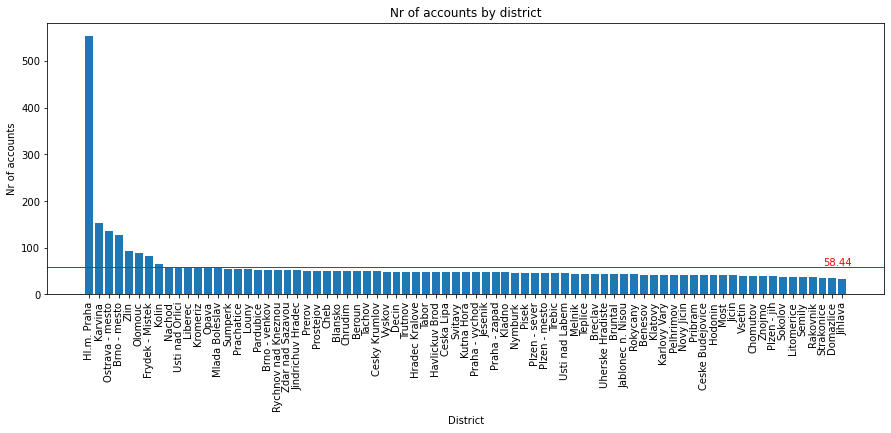

In [108]:
# Plot the number of accounts by district:

fig, ax = plt.subplots()
fig.set_size_inches(15, 5, forward=True)

# Plot the mean
ax.axhline((acc_dist.groupby('district name')['account_id'].count()).mean(), color='red', linewidth=1)

# Plot the bars
plt.bar(count_by_dist_name.index, count_by_dist_name)
plt.xticks(rotation=90)
plt.title('Nr of accounts by district')
plt.xlabel('District')
plt.ylabel('Nr of accounts')

# Make some labels.
label = round((acc_dist.groupby('district name')['account_id'].count()).mean(), 2)
x = len(acc_dist.groupby('district name')['account_id'])
y = (acc_dist.groupby('district name')['account_id'].count()).mean()

ax.text(x, y, label, ha='right', va='bottom', color = 'red')

plt.show()

## Number of clients per age group and gender

In [109]:
# Create a pivot table displaying the count of female and male clients per age group

pv_client_age = client.pivot_table(index='age_group',  # Group by
                               columns='gender',  # Group by
                               values='client_id',  # Column to aggregate
                               aggfunc='count')  # Aggregate function
pv_client_age

gender,F,M
age_group,,
0,1.0,NaN
10,237.0,259.0
20,511.0,470.0
30,477.0,508.0
40,468.0,471.0
50,483.0,471.0
60,259.0,300.0
70,201.0,236.0
80,8.0,9.0


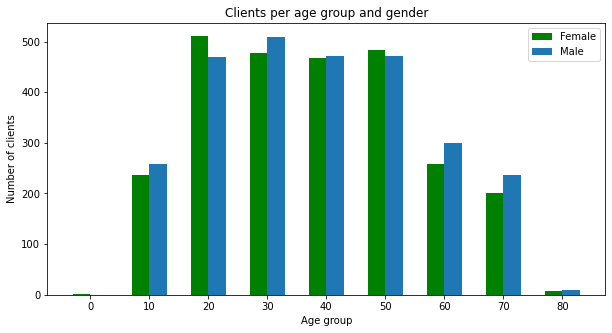

In [111]:
# Plot the client age_group and gender:

# Increase the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)

# Plot 2 bar plots together
plt.bar(pv_client_age.index, height=pv_client_age['F'], width=3, color='green')
plt.bar(pv_client_age.index + 3, height=pv_client_age['M'], width=3)

# Fix the tick label of x axis
plt.xticks(pv_client_age.index + 3/2, pv_client_age.index)

# Add label for the plot
plt.title('Clients per age group and gender')
plt.xlabel('Age group')
plt.ylabel('Number of clients')
plt.legend(labels=['Female', 'Male'], loc='upper right')

plt.show()

## Number of clients per age group and gender at the time of account opening

In [112]:
# Extract the year of account opening from date and creating new column 'open_year'

account['open_year'] = 1900 + account['date'].astype(str).str[:2].astype(int)

# Merge client and disp tables to find the clients' age in the year of account opening
client_disp = pd.merge(client, disp, how='inner',
        left_on = 'client_id', right_on = 'client_id').sort_values(by='client_id')
client_disp_account = pd.merge(client_disp, account, how='inner',
        left_on = 'account_id', right_on = 'account_id').sort_values(by='client_id')

# Create a new column for clients' age at the time of account opening
client_disp_account['age_open_acc'] = client_disp_account['open_year'].astype(int) - client_disp_account['birth_year'].astype(int)
client_disp_account['age_open_acc_group'] = (client_disp_account['age_open_acc'] // 10) *10
client_disp_account.groupby('gender')['age_open_acc'].agg('count')

gender
F    2645
M    2724
Name: age_open_acc, dtype: int64

In [114]:
#Create a pivot table displaying the count of female and male clients per age group (age at the time the account was opened)

pv_client_age_account = client_disp_account.pivot_table(index='age_open_acc_group',  # Group by
                               columns='gender',  # Group by
                               values='client_id',  # Column to aggregate
                               aggfunc='count')  # Aggregate function
pv_client_age_account

gender,F,M
age_open_acc_group,,
0,1,2
10,289,296
20,511,462
30,461,500
40,481,490
50,457,458
60,258,292
70,183,218
80,4,6


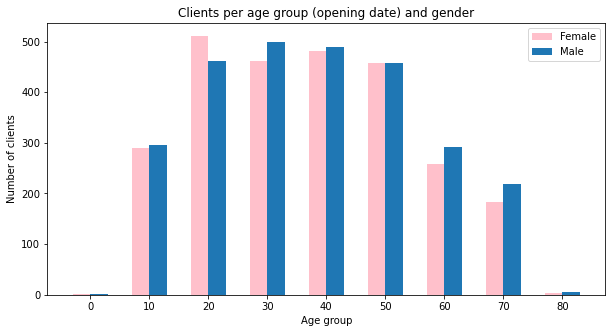

In [115]:
# Plot the client age_open_acc_group and gender using a vertical bar chart:

# Increase the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)

# Plot 2 bar plots together
plt.bar(pv_client_age_account.index, height=pv_client_age_account['F'], width=3, color='pink')
plt.bar(pv_client_age_account.index + 3, height=pv_client_age_account['M'], width=3)

# Fix the tick label of x axis
plt.xticks(pv_client_age_account.index + 3/2, pv_client_age_account.index)

# Add label for the plot
plt.title('Clients per age group (opening date) and gender')
plt.xlabel('Age group')
plt.ylabel('Number of clients')
plt.legend(labels=['Female', 'Male'], loc='upper right')

plt.show()

## Average salary by region

In [118]:
# Create a pivot table calculating the mean average salary by region: 

pv_avg_sal_reg = district.pivot_table(index = 'region', values = 'average salary', aggfunc = 'mean')
pv_avg_sal_reg = pv_avg_sal_reg.sort_values('average salary', ascending = False)

pv_avg_sal_reg

# In this case, the only possible solution is using a pivot table because we are looking for the mean average salary 
# throughout the different regions

,average salary
region,
Prague,12541.000000
central Bohemia,9357.250000
north Bohemia,9334.200000
north Moravia,9049.181818
west Bohemia,9015.400000
south Bohemia,8831.500000
south Moravia,8728.500000
east Bohemia,8611.181818


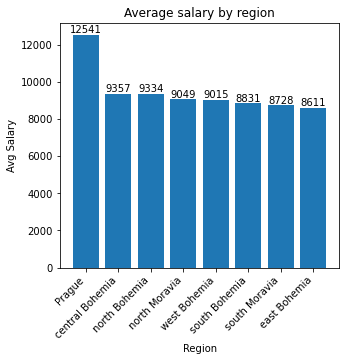

In [119]:
# Plot average salary by region using a vertical bar chart:

fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward=True)
plt.bar(pv_avg_sal_reg.index, pv_avg_sal_reg['average salary'])
fig.autofmt_xdate(rotation=45)
plt.title('Average salary by region')
plt.xlabel('Region')
plt.ylabel('Avg Salary')

rects = ax.patches

# Make some labels.
labels = pv_avg_sal_reg['average salary'].astype(np.int64)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')

plt.show()

## Credit and withdrawal by age group

## Operations types by age group

## Average vs Total Loan Expenses by Age Group

In [140]:
# Group trans_owners_age by age_group to see the average and total loan expense by age group 

avg_loan_exp_by_age = trans_owners_age[trans_owners_age['k_symbol'] == 'loan payment'].groupby('age_group')['amount'].mean()
tot_loan_exp_by_age = trans_owners_age[trans_owners_age['k_symbol'] == 'loan payment'].groupby('age_group')['amount'].sum()

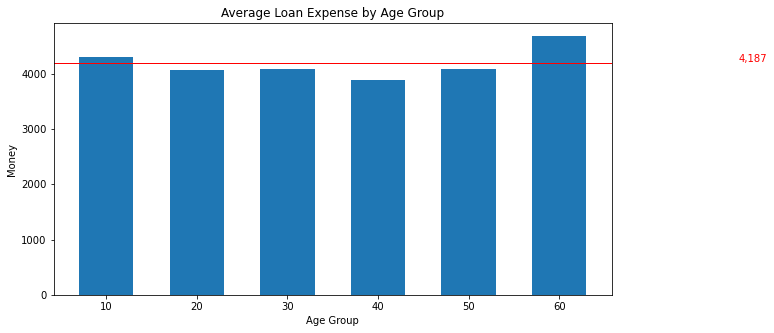

In [141]:
# Plot the Average Loan Expense by Age Group using a vertical bar chart:

fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
ax.axhline(avg_loan_exp_by_age.mean(), color='red', linewidth=1)
plt.bar(avg_loan_exp_by_age.index, avg_loan_exp_by_age, width = 6)
plt.title('Average Loan Expense by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Money')

label = "{:,}".format(round(avg_loan_exp_by_age.mean()))
x = 83
y = avg_loan_exp_by_age.mean()

ax.text(x, y, label, ha='right', va='bottom', color = 'red')

plt.show()

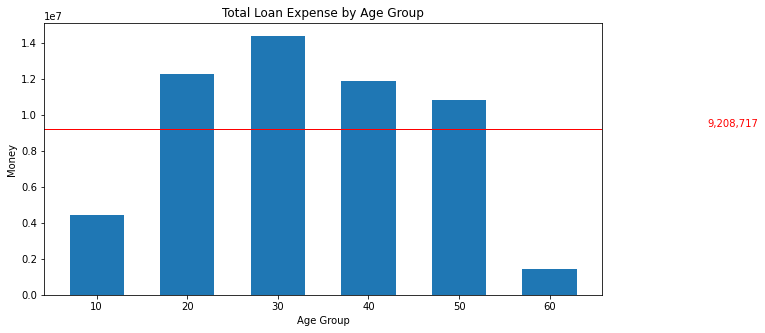

In [142]:
# Plot the Total Loan Expense by Age Group using a vertical bar chart:

fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
ax.axhline(tot_loan_exp_by_age.mean(), color='red', linewidth=1)
plt.bar(tot_loan_exp_by_age.index, tot_loan_exp_by_age, width = 6)
plt.title('Total Loan Expense by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Money')

label = "{:,}".format(round(tot_loan_exp_by_age.mean()))
x = 83
y = tot_loan_exp_by_age.mean()

ax.text(x, y, label, ha='right', va='bottom', color = 'red')

plt.show()

## Average Loan Expense against Average salary

In [143]:
# Merge trans_owners_age and district and then group by district to search a correlation between average loan expense and
# average salary in each district

trans_owners_age_distr = pd.merge(trans_owners_age, district[['district_id', 'district name', 'average salary']], on = 'district_id', how = 'inner')
grouped_loan_exp = trans_owners_age_distr.loc[trans_owners_age_distr['k_symbol'] == 'loan payment'].groupby('district name')['amount'].mean()

# Calculate the average salary per district
avg_sal_distr = trans_owners_age_distr.groupby('district name')['average salary'].mean()

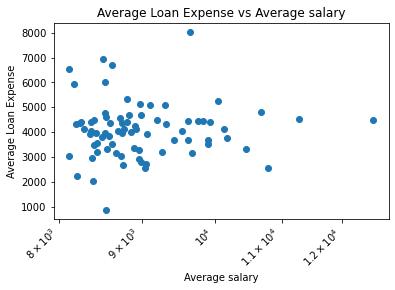

In [144]:
# Plot Average Loan Expense vs Average salary using a scatter plot 
fig, ax = plt.subplots()
plt.scatter(avg_sal_distr, grouped_loan_exp)
plt.xscale('log')
plt.title('Average Loan Expense vs Average salary')
plt.xlabel('Average salary')
plt.ylabel('Average Loan Expense')
ax.set_xticks(np.arange(8000, 13000, 1000))
fig.autofmt_xdate(rotation=45)
plt.show()

In [145]:
# Actual correlation
avg_sal_by_dist.corr(grouped_loan_exp) # no apparent correlation

0.03237830886279629